In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preparation

In [2]:
data = pd.read_csv("/Users/susu/Desktop/2021/授業/経済学のための実践的データ分析/レポート/2021_hs_6.csv")

In [3]:
data

,year,prefCode,foundation_per_year,care_per_popu,docter_per_popu,estate_price,popu_change,region_taxes_per_person,wages_per_person
0,2001,1,4.43,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2,3.69,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,3,4.14,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,4,4.45,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,5,3.60,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
794,2017,43,NaN,NaN,NaN,33045.0,-3841.0,NaN,371.0
795,2017,44,NaN,NaN,NaN,30113.0,-2885.0,NaN,378.3
796,2017,45,NaN,NaN,NaN,25611.0,-3314.0,NaN,342.5
797,2017,46,NaN,NaN,NaN,27747.0,-4756.0,NaN,359.4


**被説明変数の欠損値を確認する**

In [4]:
data['popu_change'].isnull().sum()

423

In [5]:
year = 2000
for i in range(17):
    year = year + 1
    nan_num = data[data['year']==year]['popu_change'].isnull().sum()
    print(year,nan_num )

2001 47
2002 47
2003 47
2004 47
2005 47
2006 47
2007 47
2008 47
2009 47
2010 0
2011 0
2012 0
2013 0
2014 0
2015 0
2016 0
2017 0


**2001年から2009年までのデータは被説明変数が存在していないため使えない**

**2010年から2017年までのデータを使う**

In [6]:
# get the data we need
df = data.query('year == ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]')

In [7]:
df

,year,prefCode,foundation_per_year,care_per_popu,docter_per_popu,estate_price,popu_change,region_taxes_per_person,wages_per_person
423,2010,1,3.39,513.3088,50.6378,22622.0,-8637.0,99.0,381.9
424,2010,2,2.70,634.4633,45.1825,20903.0,-5032.0,98.0,315.8
425,2010,3,2.51,573.4807,36.4528,23697.0,-4239.0,86.0,333.4
426,2010,4,3.09,516.0305,42.8938,35775.0,-555.0,103.0,381.0
427,2010,5,2.52,537.0717,38.3195,19101.0,-3728.0,83.0,322.1
...,...,...,...,...,...,...,...,...,...
794,2017,43,NaN,NaN,NaN,33045.0,-3841.0,NaN,371.0
795,2017,44,NaN,NaN,NaN,30113.0,-2885.0,NaN,378.3
796,2017,45,NaN,NaN,NaN,25611.0,-3314.0,NaN,342.5
797,2017,46,NaN,NaN,NaN,27747.0,-4756.0,NaN,359.4


**add prefrecture name into the dataframe**

In [8]:
df.loc[df['prefCode']==1, 'pref_name'] = 'Hokkaido'
df.loc[df['prefCode']==2, 'pref_name'] = 'Aomori'
df.loc[df['prefCode']==3, 'pref_name'] = 'Iwate'
df.loc[df['prefCode']==4, 'pref_name'] = 'Miyagi'
df.loc[df['prefCode']==5, 'pref_name'] = 'Akita'
df.loc[df['prefCode']==6, 'pref_name'] = 'Yamagata'
df.loc[df['prefCode']==7, 'pref_name'] = 'Fukushima'
df.loc[df['prefCode']==8, 'pref_name'] = 'Ibaraki'
df.loc[df['prefCode']==9, 'pref_name'] = 'Tochigi'
df.loc[df['prefCode']==10, 'pref_name'] = 'Gunma'
df.loc[df['prefCode']==11, 'pref_name'] = 'Saitama'
df.loc[df['prefCode']==12, 'pref_name'] = 'Chiba'
df.loc[df['prefCode']==13, 'pref_name'] = 'Tokyo'
df.loc[df['prefCode']==14, 'pref_name'] = 'Kanagawa'
df.loc[df['prefCode']==15, 'pref_name'] = 'Niigata'
df.loc[df['prefCode']==16, 'pref_name'] = 'Toyama'
df.loc[df['prefCode']==17, 'pref_name'] = 'Ishikawa'
df.loc[df['prefCode']==18, 'pref_name'] = 'Fukui'
df.loc[df['prefCode']==19, 'pref_name'] = 'Yamanashi'
df.loc[df['prefCode']==20, 'pref_name'] = 'Nagano'
df.loc[df['prefCode']==21, 'pref_name'] = 'Gifu'
df.loc[df['prefCode']==22, 'pref_name'] = 'Shizuoka'
df.loc[df['prefCode']==23, 'pref_name'] = 'Aichi'
df.loc[df['prefCode']==24, 'pref_name'] = 'Mie'
df.loc[df['prefCode']==25, 'pref_name'] = 'Shiga'
df.loc[df['prefCode']==26, 'pref_name'] = 'Kyoto'
df.loc[df['prefCode']==27, 'pref_name'] = 'Osaka'
df.loc[df['prefCode']==28, 'pref_name'] = 'Hyogo'
df.loc[df['prefCode']==29, 'pref_name'] = 'Nara'
df.loc[df['prefCode']==30, 'pref_name'] = 'Wakayama'
df.loc[df['prefCode']==31, 'pref_name'] = 'Tottori'
df.loc[df['prefCode']==32, 'pref_name'] = 'Shimane'
df.loc[df['prefCode']==33, 'pref_name'] = 'Okayama'
df.loc[df['prefCode']==34, 'pref_name'] = 'Hiroshima'
df.loc[df['prefCode']==35, 'pref_name'] = 'Yamaguchi'
df.loc[df['prefCode']==36, 'pref_name'] = 'Tokushima'
df.loc[df['prefCode']==37, 'pref_name'] = 'Kagawa'
df.loc[df['prefCode']==38, 'pref_name'] = 'Ehime'
df.loc[df['prefCode']==39, 'pref_name'] = 'Kochi'
df.loc[df['prefCode']==40, 'pref_name'] = 'Fukuoka'
df.loc[df['prefCode']==41, 'pref_name'] = 'Saga'
df.loc[df['prefCode']==42, 'pref_name'] = 'Nagasaki'
df.loc[df['prefCode']==43, 'pref_name'] = 'Kumamoto'
df.loc[df['prefCode']==44, 'pref_name'] = 'Oita'
df.loc[df['prefCode']==45, 'pref_name'] = 'Miyazaki'
df.loc[df['prefCode']==46, 'pref_name'] = 'Kagoshima'
df.loc[df['prefCode']==47, 'pref_name'] = 'Okinawa'

/Users/susu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/susu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/susu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [9]:
df

,year,prefCode,foundation_per_year,care_per_popu,docter_per_popu,estate_price,popu_change,region_taxes_per_person,wages_per_person,pref_name
423,2010,1,3.39,513.3088,50.6378,22622.0,-8637.0,99.0,381.9,Hokkaido
424,2010,2,2.70,634.4633,45.1825,20903.0,-5032.0,98.0,315.8,Aomori
425,2010,3,2.51,573.4807,36.4528,23697.0,-4239.0,86.0,333.4,Iwate
426,2010,4,3.09,516.0305,42.8938,35775.0,-555.0,103.0,381.0,Miyagi
427,2010,5,2.52,537.0717,38.3195,19101.0,-3728.0,83.0,322.1,Akita
...,...,...,...,...,...,...,...,...,...,...
794,2017,43,NaN,NaN,NaN,33045.0,-3841.0,NaN,371.0,Kumamoto
795,2017,44,NaN,NaN,NaN,30113.0,-2885.0,NaN,378.3,Oita
796,2017,45,NaN,NaN,NaN,25611.0,-3314.0,NaN,342.5,Miyazaki
797,2017,46,NaN,NaN,NaN,27747.0,-4756.0,NaN,359.4,Kagoshima


In [10]:
# check null values
df.isnull().sum()

year                         0
prefCode                     0
foundation_per_year         47
care_per_popu               47
docter_per_popu            141
estate_price                 0
popu_change                  0
region_taxes_per_person     47
wages_per_person             0
pref_name                    0
dtype: int64

**欠損値を削除すると2010年から2014年までのデータしか残っていないため、回帰分析を行う際は2010年から2014年までのデータを使う、トレンドを見る際は2010年から2017年までのデータを使う**

In [11]:
# how to deal with null values?
# 1delete null values
df1 = df.dropna()
df1

,year,prefCode,foundation_per_year,care_per_popu,docter_per_popu,estate_price,popu_change,region_taxes_per_person,wages_per_person,pref_name
423,2010,1,3.39,513.3088,50.6378,22622.0,-8637.0,99.0,381.9,Hokkaido
424,2010,2,2.70,634.4633,45.1825,20903.0,-5032.0,98.0,315.8,Aomori
425,2010,3,2.51,573.4807,36.4528,23697.0,-4239.0,86.0,333.4,Iwate
426,2010,4,3.09,516.0305,42.8938,35775.0,-555.0,103.0,381.0,Miyagi
427,2010,5,2.52,537.0717,38.3195,19101.0,-3728.0,83.0,322.1,Akita
...,...,...,...,...,...,...,...,...,...,...
653,2014,43,5.90,856.1508,53.7815,29059.0,-2860.0,92.0,364.9,Kumamoto
654,2014,44,5.83,785.3026,52.3646,25825.0,-2648.0,95.0,374.4,Oita
655,2014,45,5.44,787.1473,52.4324,24793.0,-3185.0,89.0,346.7,Miyazaki
656,2014,46,5.57,847.0711,57.0999,26679.0,-4559.0,85.0,360.9,Kagoshima


# Data exploratory

**まず各都道府県の人口流出のトレンドをプロットしてみる PS: 絶対値を取った後プロットする**

In [12]:
df_trend = df[['year', 'prefCode', 'popu_change','pref_name']]
df_trend['popu_change'] = df_trend['popu_change'].abs()
df_trend

<ipython-input-12-0769f4924cc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['popu_change'] = df_trend['popu_change'].abs()


,year,prefCode,popu_change,pref_name
423,2010,1,8637.0,Hokkaido
424,2010,2,5032.0,Aomori
425,2010,3,4239.0,Iwate
426,2010,4,555.0,Miyagi
427,2010,5,3728.0,Akita
...,...,...,...,...
794,2017,43,3841.0,Kumamoto
795,2017,44,2885.0,Oita
796,2017,45,3314.0,Miyazaki
797,2017,46,4756.0,Kagoshima


**plot out trend**

**エラー出たが、しばらく待てばちゃんと図が出てくる（なぜこうなっているかはまだわからない）もし出来なかったら、y_reshapeのところを動かせばいいかも（あくまでも個人の予測に過ぎない）**

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

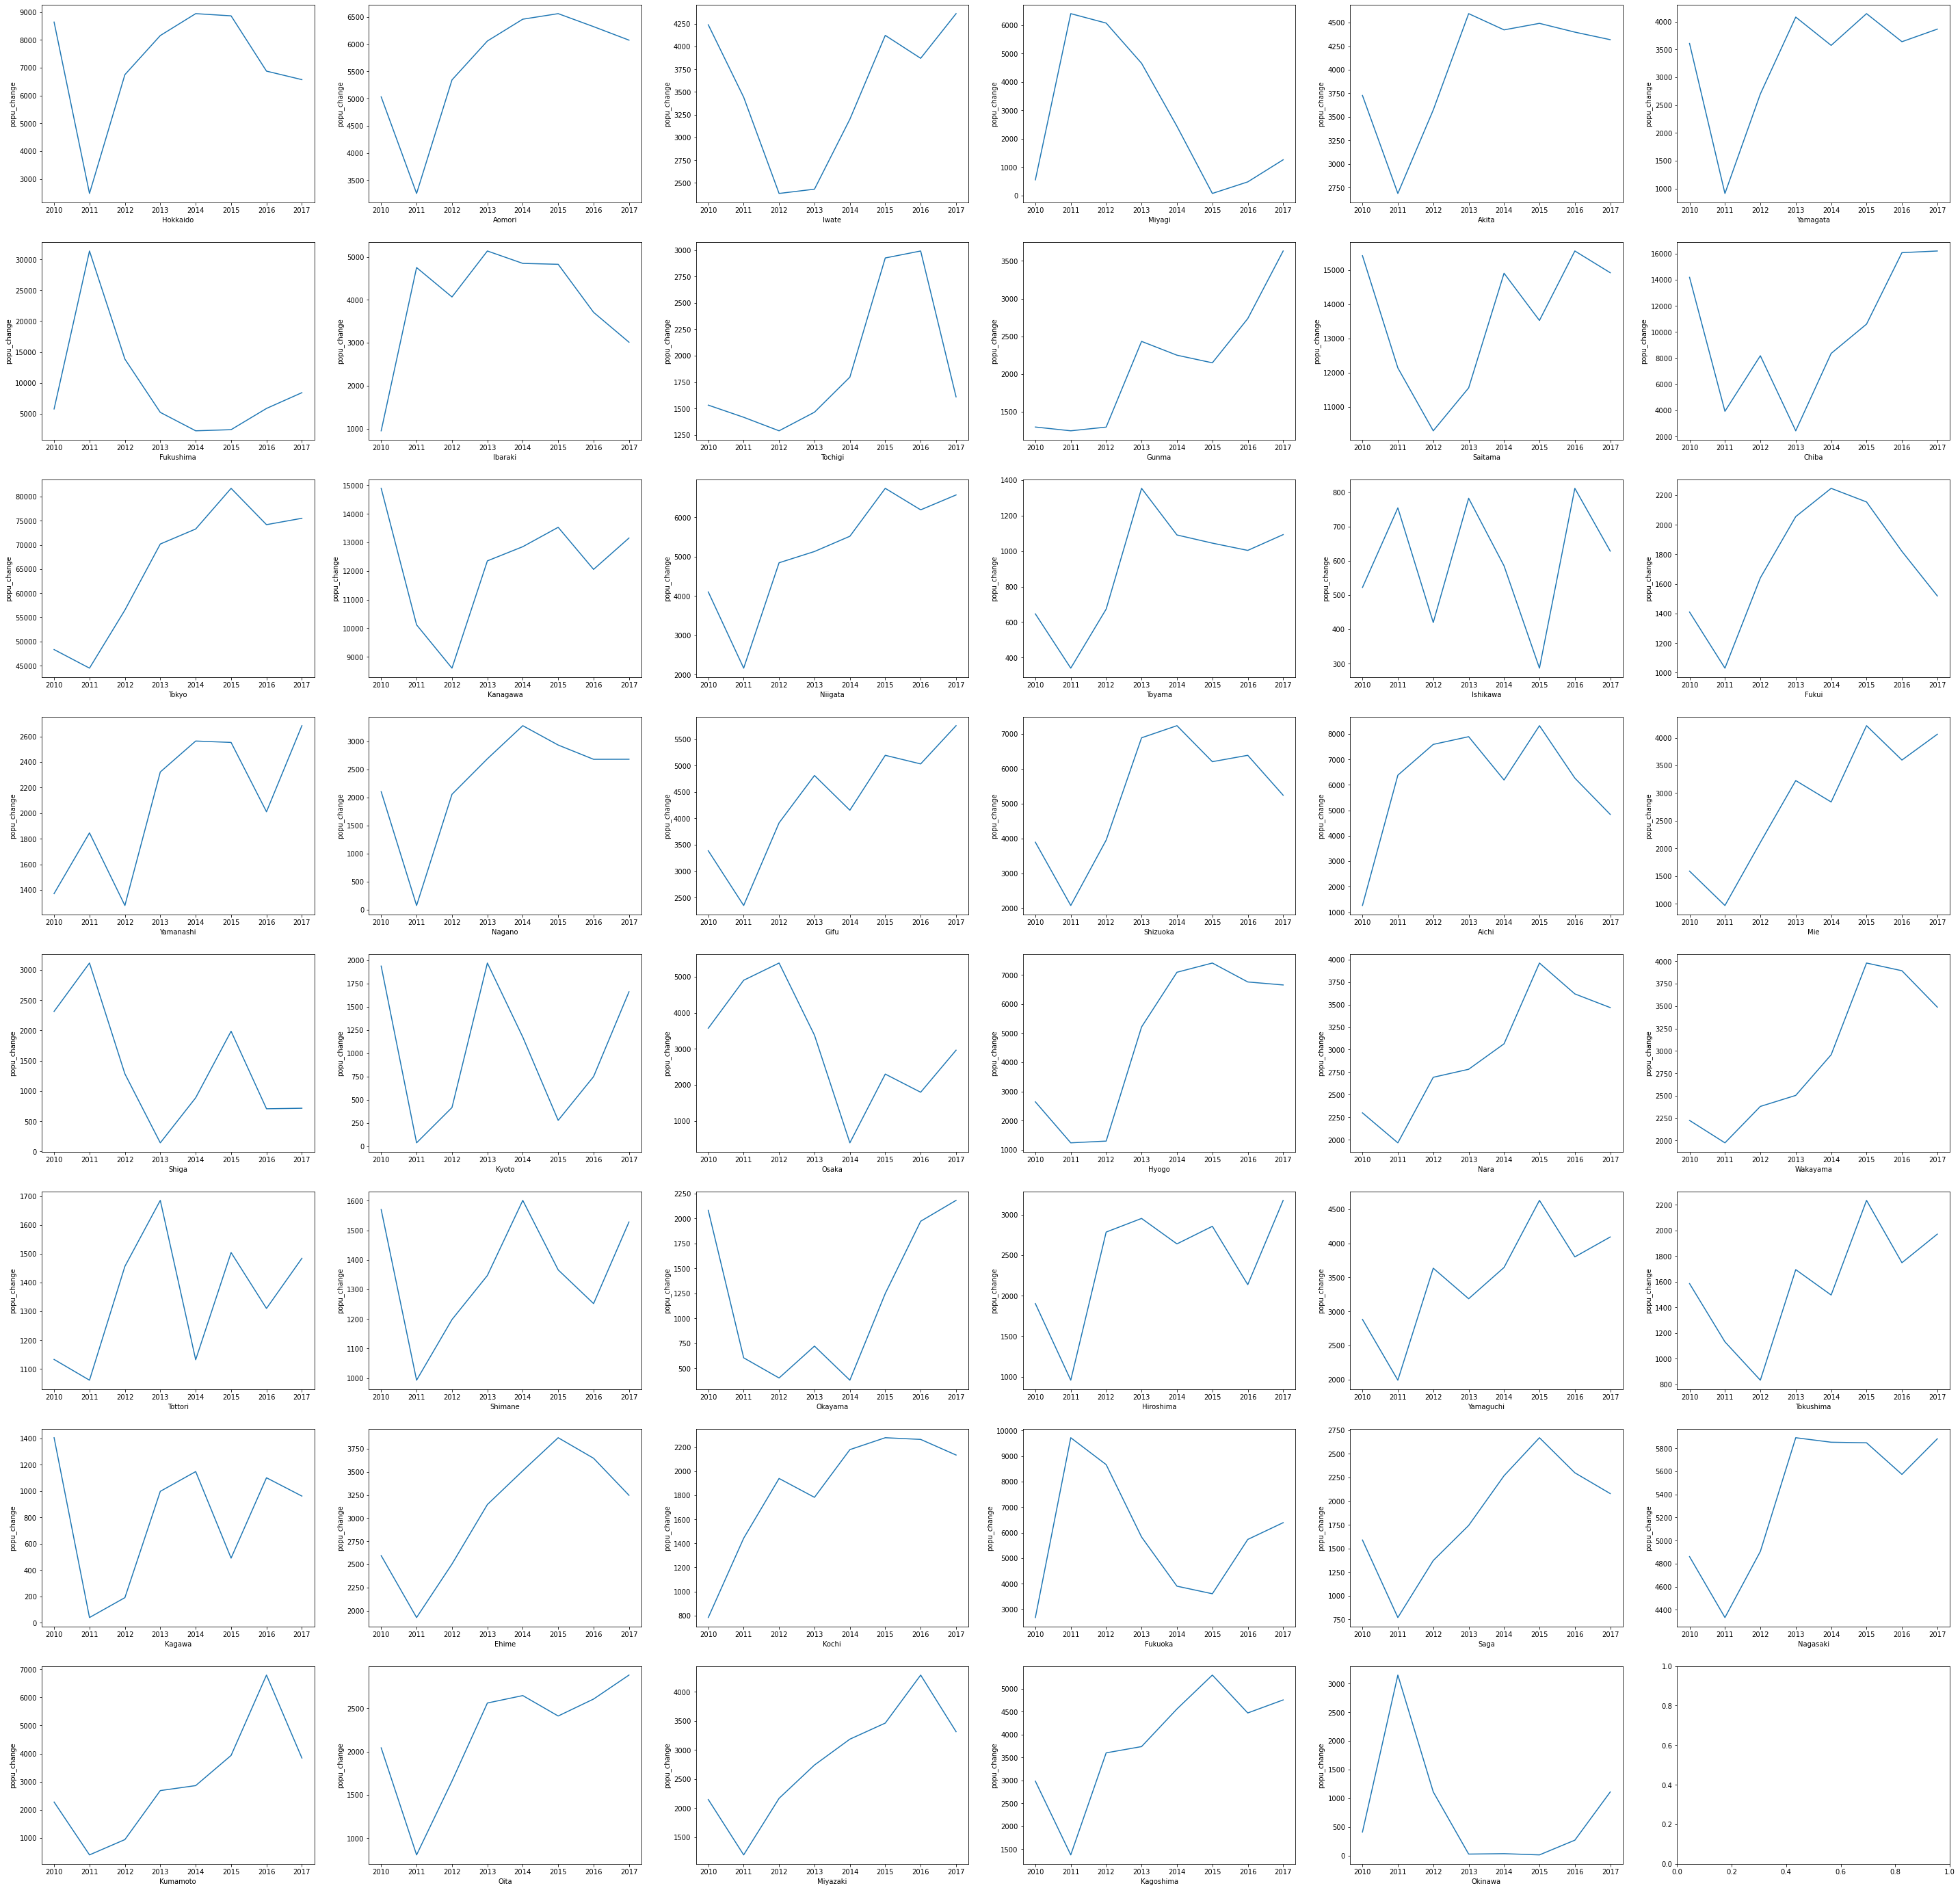

In [13]:
fig, ax = plt.subplots(8, 6, figsize=(50, 50))

x_year = df_trend.sort_values('year')['year'].unique()
x_label = df_trend['pref_name'].unique()

for i in range(8):
    for j in range(6):
        
        y = df_trend[df_trend['prefCode']==6*i+j+1]['popu_change']
        y_array = np.array(y)
#         y_shape = y_array.reshape(8,1)
        ax[i, j].plot(x_year, y_array)
        ax[i, j].set_xlabel(x_label[6*i+j])
        ax[i, j].set_ylabel("popu_change")
        if 6*i+j >= 47:
            
            break

plt.show()

**上の図がちょっと読みずらいんで、ここからinteractiveの折り線図を作ってみる**

In [15]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [17]:
import plotly
import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

app = dash.Dash( __name__ )

**css fileは必ずnotebookと同じところに入っている、そうしないと読めないかも？？提出する前に要確認**

In [ ]:
app.layout = html.Div([

    html.Div([
        dcc.Graph(id='our_graph')
    ],className='nine columns'),

    html.Div([

        html.Br(),
        html.Label(['Choose 3 prefectures to Compare:'],style={'font-weight': 'bold', "text-align": "center"}),
        dcc.Dropdown(id='cuisine_one',
            options=[{'label':x, 'value':x} for x in df_trend['pref_name'].unique()],
            value='Hokkaido',
            multi=False,
            disabled=False,
            clearable=False,
            searchable=True,
            placeholder='Select...',
            className='form-dropdown',
            style={'width':"90%"},
            persistence='string',
            persistence_type='memory'),

        dcc.Dropdown(id='cuisine_two',
            options=[{'label':x, 'value':x} for x in df_trend['pref_name'].unique()],
            value='Oita',
            multi=False,
            clearable=False,
            persistence='string',
            persistence_type='session'),

        dcc.Dropdown(id='cuisine_three',
            options=[{'label':x, 'value':x} for x in df_trend['pref_name'].unique()],
            value='Kagoshima',
            multi=False,
            clearable=False,
            persistence='string',
            persistence_type='local'),

    ],className='three columns'),

])

#---------------------------------------------------------------

@app.callback(
    Output('our_graph','figure'),
    [Input('cuisine_one','value'),
     Input('cuisine_two','value'),
     Input('cuisine_three','value')]
)

def build_graph(first_cuisine, second_cuisine, third_cuisine):
    dff=df_trend[(df_trend['pref_name']==first_cuisine)|
           (df_trend['pref_name']==second_cuisine)|
           (df_trend['pref_name']==third_cuisine)]


    fig = px.line(dff, x='year', y='popu_change', color='pref_name', height=600)
    fig.update_layout(yaxis={'title':'Population outflow'},
                      title={'text':'Population outflow in Japan from 2010 to 2017',
                      'font':{'size':28},'x':0.5,'xanchor':'center'})
    return fig

#---------------------------------------------------------------

if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /assets/bWLwgP.css?m=1622168884.0 HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1622523567.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1622523567.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1622523567.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1622523567.min.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_16_0m1622523567.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2021 00:02:30] "GET /_dash-component-suites/dash_rende

# Regression Part

**被説明変数の欠損値のため、2010年から2014年までのデータを使用する**

**相関関係を確認. df3は2010年から2014年までのデータ**

<AxesSubplot:>

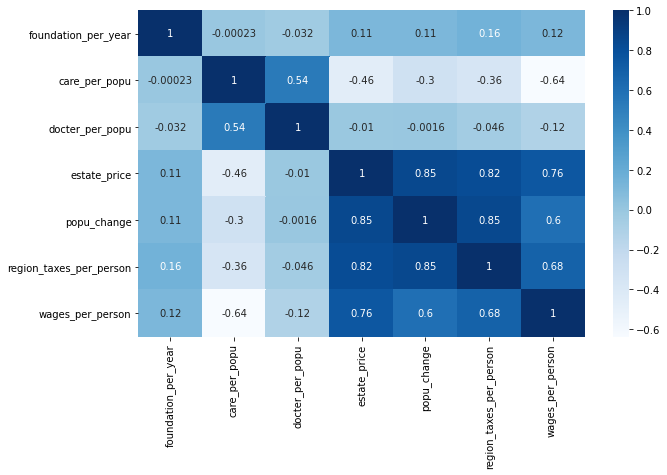

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.drop(columns=['year', 'prefCode'], axis = 1).corr(), annot=True, cmap='Blues')

**heatmapから見るとpopu_changeとestate_price、region_taxes_per_person; region_taxes_per_personとestate_priceの相関関係が高いと確認できる**

In [24]:
df1

,year,prefCode,foundation_per_year,care_per_popu,docter_per_popu,estate_price,popu_change,region_taxes_per_person,wages_per_person,pref_name
423,2010,1,3.39,513.3088,50.6378,22622.0,-8637.0,99.0,381.9,Hokkaido
424,2010,2,2.70,634.4633,45.1825,20903.0,-5032.0,98.0,315.8,Aomori
425,2010,3,2.51,573.4807,36.4528,23697.0,-4239.0,86.0,333.4,Iwate
426,2010,4,3.09,516.0305,42.8938,35775.0,-555.0,103.0,381.0,Miyagi
427,2010,5,2.52,537.0717,38.3195,19101.0,-3728.0,83.0,322.1,Akita
...,...,...,...,...,...,...,...,...,...,...
653,2014,43,5.90,856.1508,53.7815,29059.0,-2860.0,92.0,364.9,Kumamoto
654,2014,44,5.83,785.3026,52.3646,25825.0,-2648.0,95.0,374.4,Oita
655,2014,45,5.44,787.1473,52.4324,24793.0,-3185.0,89.0,346.7,Miyazaki
656,2014,46,5.57,847.0711,57.0999,26679.0,-4559.0,85.0,360.9,Kagoshima


**パネルデータのindexをresetしないとよくエラー出てくる**

In [26]:
# point: put prefcode and year into index
df3=df1.set_index(['year','prefCode'])
df3

foundation_per_year  care_per_popu  docter_per_popu  \
year prefCode                                                        
2010 1                        3.39       513.3088          50.6378   
     2                        2.70       634.4633          45.1825   
     3                        2.51       573.4807          36.4528   
     4                        3.09       516.0305          42.8938   
     5                        2.52       537.0717          38.3195   
...                            ...            ...              ...   
2014 43                       5.90       856.1508          53.7815   
     44                       5.83       785.3026          52.3646   
     45                       5.44       787.1473          52.4324   
     46                       5.57       847.0711          57.0999   
     47                       7.34       763.7037          42.4522   

               estate_price  popu_change  region_taxes_per_person  \
year prefCode                                                       
2010 1              22622.0      -8637.0                     99.0   
     2              20903.0      -5032.0                     98.0   
     3              23697.0      -4239.0                     86.0   
     4              35775.0       -555.0                    103.0   
     5              19101.0      -3728.0                     83.0   
...                     ...          ...                      ...   
2014 43             29059.0      -2860.0                     92.0   
     44             25825.0      -2648.0                     95.0   
     45             24793.0      -3185.0                     89.0   
     46             26679.0      -4559.0                     85.0   
     47             45177.0        -37.0                     77.0   

               wages_per_person  pref_name  
year prefCode                               
2010 1                    381.9   Hokkaido  
     2                    315.8     Aomori  
     3                    333.4      Iwate  
     4                    381.0     Miyagi  
     5                    322.1      Akita  
...                         ...        ...  
2014 43                   364.9   Kumamoto  
     44                   374.4       Oita  
     45                   346.7   Miyazaki  
     46                   360.9  Kagoshima  
     47                   317.0    Okinawa  

[235 rows x 8 columns]

# Pooled OLS モデルで分析する

In [33]:
df3.isnull().sum()

foundation_per_year        0
care_per_popu              0
docter_per_popu            0
estate_price               0
popu_change                0
region_taxes_per_person    0
wages_per_person           0
pref_name                  0
dtype: int64

**foundation_per_year、 care_per_popu、 docter_per_popuのp_valueが0.05より大きいため、有意ではないことはわかった。estate_price、region_taxes_per_person、wages_per_personは統計的には有意であることは確認できた。結果は以下通り。**

In [35]:
from linearmodels import PooledOLS 
import statsmodels.api as sm

exog_vars = ['foundation_per_year','care_per_popu','docter_per_popu','estate_price','region_taxes_per_person','wages_per_person']
mod = PooledOLS(df3['popu_change'], sm.add_constant(df3[exog_vars]))
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            popu_change   R-squared:                        0.8071
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:                 235   R-squared (Within):               0.8087
Date:                Wed, Jun 02 2021   R-squared (Overall):              0.8071
Time:                        15:18:59   Log-likelihood                   -2303.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      159.03
Entities:                           5   P-value                           0.0000
Avg Obs:                       47.000   Distribution:                   F(6,228)
Min Obs:                       47.000                                           
Max Obs:                       47.000   F-statistic (robust):             159.03
                            

**data preparation for plotting fitted values and real values**

In [52]:
X = sm.add_constant(df3.drop(columns=['popu_change','pref_name']))
X

const  foundation_per_year  care_per_popu  docter_per_popu  \
year prefCode                                                               
2010 1           1.0                 3.39       513.3088          50.6378   
     2           1.0                 2.70       634.4633          45.1825   
     3           1.0                 2.51       573.4807          36.4528   
     4           1.0                 3.09       516.0305          42.8938   
     5           1.0                 2.52       537.0717          38.3195   
...              ...                  ...            ...              ...   
2014 43          1.0                 5.90       856.1508          53.7815   
     44          1.0                 5.83       785.3026          52.3646   
     45          1.0                 5.44       787.1473          52.4324   
     46          1.0                 5.57       847.0711          57.0999   
     47          1.0                 7.34       763.7037          42.4522   

               estate_price  region_taxes_per_person  wages_per_person  
year prefCode                                                           
2010 1              22622.0                     99.0             381.9  
     2              20903.0                     98.0             315.8  
     3              23697.0                     86.0             333.4  
     4              35775.0                    103.0             381.0  
     5              19101.0                     83.0             322.1  
...                     ...                      ...               ...  
2014 43             29059.0                     92.0             364.9  
     44             25825.0                     95.0             374.4  
     45             24793.0                     89.0             346.7  
     46             26679.0                     85.0             360.9  
     47             45177.0                     77.0             317.0  

[235 rows x 7 columns]

In [54]:
y_poolpred = pooled_res.predict(X)
y_poolpred

predictions
year prefCode             
2010 1        -4390.132523
     2        -1945.481332
     3        -3747.943334
     4        -1873.011714
     5        -4708.522974
...                    ...
2014 43       -2089.772471
     44       -2793.700372
     45       -2898.153124
     46       -3317.403558
     47        -985.425246

[235 rows x 1 columns]

**外れ値がちょっと気になる**

Text(0, 0.5, 'Predicted Value')

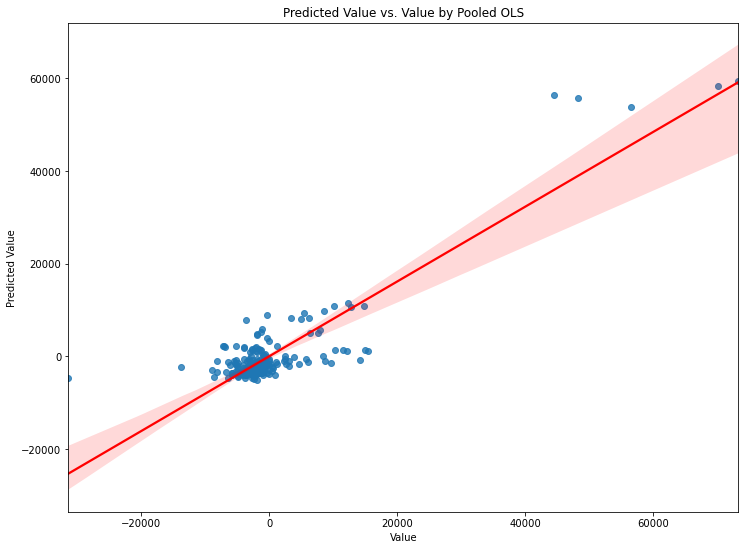

In [55]:
plt.figure(figsize=(12, 9))
sns.regplot(x=df3['popu_change'], y=y_poolpred, line_kws={'color': 'red'})
plt.title('Predicted Value vs. Value by Pooled OLS')
plt.xlabel('Value')
plt.ylabel('Predicted Value')

# 固定効果モデルで分析する

In [56]:
!pip install linearmodels

**p_valueから見るとfoundation_per_year、docter_per_popu、estate_price、wages_per_personは有意ではない**

In [57]:
from linearmodels.panel import PanelOLS

df3_fet = PanelOLS.from_formula("popu_change ~ foundation_per_year + care_per_popu + docter_per_popu + estate_price + region_taxes_per_person + wages_per_person + EntityEffects + TimeEffects", data=df3)                          
print(df3_fet.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:            popu_change   R-squared:                        0.2301
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 235   R-squared (Within):              -1.5848
Date:                Wed, Jun 02 2021   R-squared (Overall):             -58.138
Time:                        15:49:47   Log-likelihood                   -2180.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.8656
Entities:                           5   P-value                           0.0000
Avg Obs:                       47.000   Distribution:                   F(6,178)
Min Obs:                       47.000                                           
Max Obs:                       47.000   F-statistic (robust):             8.8656
                            

In [61]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
exog = X
fe = PanelOLS(df3['popu_change'], exog, entity_effects=True, time_effects=True)
fe = fe.fit()
print(fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:            popu_change   R-squared:                        0.2301
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 235   R-squared (Within):              -1.5848
Date:                Wed, Jun 02 2021   R-squared (Overall):             -1.6595
Time:                        15:56:50   Log-likelihood                   -2180.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.8656
Entities:                           5   P-value                           0.0000
Avg Obs:                       47.000   Distribution:                   F(6,178)
Min Obs:                       47.000                                           
Max Obs:                       47.000   F-statistic (robust):             8.8656
                            

In [62]:
y_fetpred = fe.predict(X)
y_fetpred

predictions
year prefCode              
2010 1         -9630.172916
     2         -7666.134900
     3        -15330.551853
     4         -5761.713618
     5        -18214.328766
...                     ...
2014 43        -3506.504110
     44        -4266.103377
     45        -7295.115880
     46        -7567.657807
     47        -9947.707383

[235 rows x 1 columns]

Text(0, 0.5, 'Predicted Value')

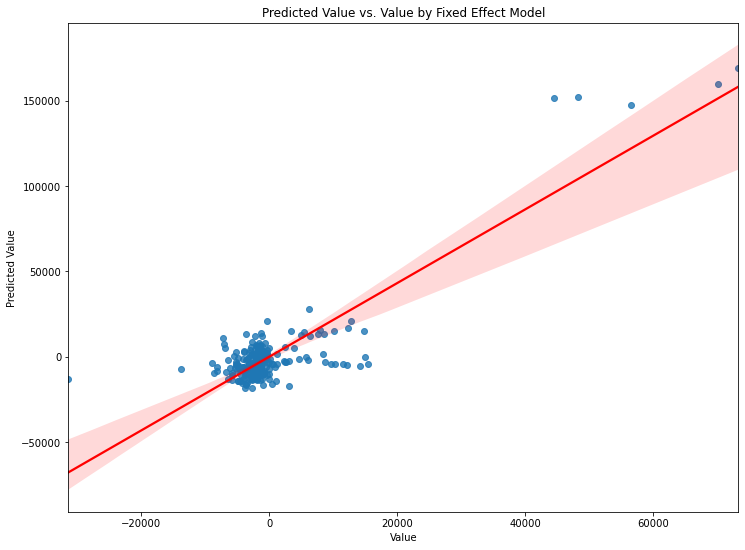

In [63]:
plt.figure(figsize=(12, 9))
sns.regplot(x=df3['popu_change'], y=y_fetpred, line_kws={'color': 'red'})
plt.title('Predicted Value vs. Value by Fixed Effect Model')
plt.xlabel('Value')
plt.ylabel('Predicted Value')

# 変動効果モデルで分析する

**foundation_per_year、care_per_popu、docter_per_popuは有意ではない**

In [59]:
from linearmodels.panel import RandomEffects 
import statsmodels.api as sm

exog_vars = ['foundation_per_year','care_per_popu','docter_per_popu','estate_price','region_taxes_per_person','wages_per_person']
mod = RandomEffects(df3['popu_change'], sm.add_constant(df3[exog_vars]))
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:            popu_change   R-squared:                        0.8071
Estimator:              RandomEffects   R-squared (Between):              0.0000
No. Observations:                 235   R-squared (Within):               0.8087
Date:                Wed, Jun 02 2021   R-squared (Overall):              0.8071
Time:                        15:53:32   Log-likelihood                   -2303.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      159.03
Entities:                           5   P-value                           0.0000
Avg Obs:                       47.000   Distribution:                   F(6,228)
Min Obs:                       47.000                                           
Max Obs:                       47.000   F-statistic (robust):             159.03
                            

In [64]:
y_repred = re_res.predict(X)
y_repred

predictions
year prefCode             
2010 1        -4390.132523
     2        -1945.481332
     3        -3747.943334
     4        -1873.011714
     5        -4708.522974
...                    ...
2014 43       -2089.772471
     44       -2793.700372
     45       -2898.153124
     46       -3317.403558
     47        -985.425246

[235 rows x 1 columns]

Text(0, 0.5, 'Predicted Value')

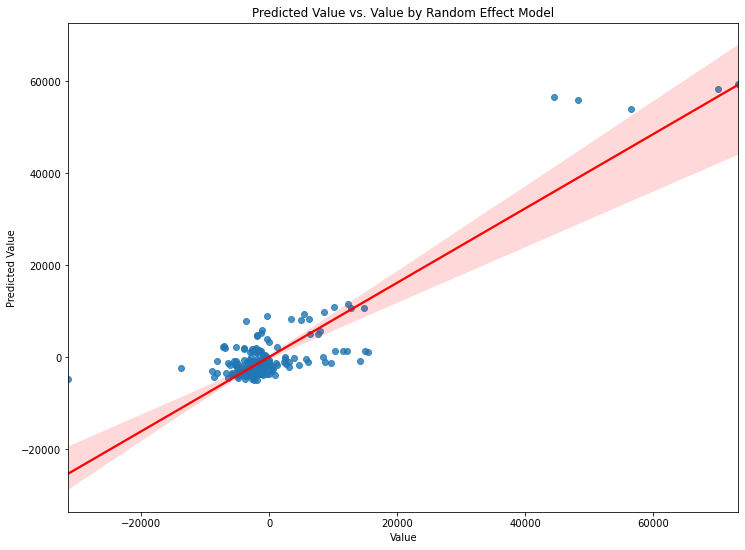

In [65]:
plt.figure(figsize=(12, 9))
sns.regplot(x=df3['popu_change'], y=y_repred, line_kws={'color': 'red'})
plt.title('Predicted Value vs. Value by Random Effect Model')
plt.xlabel('Value')
plt.ylabel('Predicted Value')

# Comparison between Models

In [67]:
from linearmodels.panel import compare
print(compare({'FE':fe,'RE':re_res,'Pooled':pooled_res}))

                               Model Comparison                              
                                         FE                RE          Pooled
-----------------------------------------------------------------------------
Dep. Variable                   popu_change       popu_change     popu_change
Estimator                          PanelOLS     RandomEffects       PooledOLS
No. Observations                        235               235             235
Cov. Est.                        Unadjusted        Unadjusted      Unadjusted
R-squared                            0.2301            0.8071          0.8071
R-Squared (Within)                  -1.5848            0.8087          0.8087
R-Squared (Between)                  0.0000            0.0000          0.0000
R-Squared (Overall)                 -1.6595            0.8071          0.8071
F-statistic                          8.8656            159.03          159.03
P-value (F-stat)                     0.0000            0.0000   

**三つの図を一行に比較できるように一行に置きたかったが、表示されなかった【未解決】**

In [1]:
ax1 = fig.add_subplot(1, 3, 1)
sns.regplot(x=df3['popu_change'], y=y_poolpred, line_kws={'color': 'red'}, ax=ax1)
ax2 = fig.add_subplot(1, 3, 2)
sns.regplot(x=df3['popu_change'], y=y_fetpred, line_kws={'color': 'red'}, ax=ax2)
ax3 = fig.add_subplot(1, 3, 3)
sns.regplot(x=df3['popu_change'], y=y_repred, line_kws={'color': 'red'}, ax=ax3)
plt.show()

NameError: name 'fig' is not defined

# 参考リスト

https://github.com/Coding-with-Adam/Dash-by-Plotly/blob/master/Dash_Interactive_Graphs/Line_chart/line.py